In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
results_dir = "coloring"

In [4]:
filename = "rank_effects_by_node_avg__graph_7"

In [5]:
df = pd.read_csv(f"results/{results_dir}/{filename}.csv")

In [6]:
df

,node,-5,-4,-3,-2,-1,0,1,2,3,4,5
0,0,0,760,2888,5568,6336,14976,6336,5568,2888,760,0
1,1,0,0,0,0,2302,6916,2302,0,0,0,0
2,2,0,0,0,0,2302,6916,2302,0,0,0,0
3,3,0,0,0,0,2302,6916,2302,0,0,0,0
4,4,0,0,0,764,5380,10752,5380,764,0,0,0
5,5,390,1930,4640,5280,5840,21440,5840,5280,4640,1930,390
6,6,0,0,0,0,1918,7684,1918,0,0,0,0
7,7,0,0,0,0,1918,7684,1918,0,0,0,0
8,8,0,0,0,0,1918,7684,1918,0,0,0,0
9,9,0,0,0,0,1918,7684,1918,0,0,0,0


In [7]:
df.drop(['-5', '-4', '-3', '-2', '-1'], axis=1, inplace = True)
df

,node,0,1,2,3,4,5
0,0,14976,6336,5568,2888,760,0
1,1,6916,2302,0,0,0,0
2,2,6916,2302,0,0,0,0
3,3,6916,2302,0,0,0,0
4,4,10752,5380,764,0,0,0
5,5,21440,5840,5280,4640,1930,390
6,6,7684,1918,0,0,0,0
7,7,7684,1918,0,0,0,0
8,8,7684,1918,0,0,0,0
9,9,7684,1918,0,0,0,0


In [8]:
rank_effects = ['0', '1', '2', '3', '4', '5']

In [9]:
df['total'] = df.loc[:, rank_effects].sum(axis=1)

In [10]:
df

,node,0,1,2,3,4,5,total
0,0,14976,6336,5568,2888,760,0,30528
1,1,6916,2302,0,0,0,0,9218
2,2,6916,2302,0,0,0,0,9218
3,3,6916,2302,0,0,0,0,9218
4,4,10752,5380,764,0,0,0,16896
5,5,21440,5840,5280,4640,1930,390,39520
6,6,7684,1918,0,0,0,0,9602
7,7,7684,1918,0,0,0,0,9602
8,8,7684,1918,0,0,0,0,9602
9,9,7684,1918,0,0,0,0,9602


In [11]:
for re in rank_effects:
    df.loc[:, re] = df.loc[:, re]/df.loc[:, 'total'] * 100

In [12]:
df.drop('total', axis=1, inplace=True)
df

,node,0,1,2,3,4,5
0,0,49.056604,20.754717,18.238994,9.460168,2.489518,0.000000
1,1,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
2,2,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
3,3,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
4,4,63.636364,31.841856,4.521780,0.000000,0.000000,0.000000
5,5,54.251012,14.777328,13.360324,11.740891,4.883603,0.986842
6,6,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000
7,7,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000
8,8,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000
9,9,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000


In [13]:
df.set_index('node')

,0,1,2,3,4,5
node,,,,,,
0,49.056604,20.754717,18.238994,9.460168,2.489518,0.000000
1,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
2,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
3,75.027121,24.972879,0.000000,0.000000,0.000000,0.000000
4,63.636364,31.841856,4.521780,0.000000,0.000000,0.000000
5,54.251012,14.777328,13.360324,11.740891,4.883603,0.986842
6,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000
7,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000
8,80.024995,19.975005,0.000000,0.000000,0.000000,0.000000


In [14]:
dft = df.transpose()
dft.drop(['node'], inplace=True)
dft = dft.add_prefix('Node_')
dft

,Node_0,Node_1,Node_2,Node_3,Node_4,Node_5,Node_6,Node_7,Node_8,Node_9
0,49.056604,75.027121,75.027121,75.027121,63.636364,54.251012,80.024995,80.024995,80.024995,80.024995
1,20.754717,24.972879,24.972879,24.972879,31.841856,14.777328,19.975005,19.975005,19.975005,19.975005
2,18.238994,0.000000,0.000000,0.000000,4.521780,13.360324,0.000000,0.000000,0.000000,0.000000
3,9.460168,0.000000,0.000000,0.000000,0.000000,11.740891,0.000000,0.000000,0.000000,0.000000
4,2.489518,0.000000,0.000000,0.000000,0.000000,4.883603,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.986842,0.000000,0.000000,0.000000,0.000000


In [15]:
plt.ioff()
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

In [16]:
plt.ioff()
ax = sns.lineplot(dft, linewidth=2, markersize=10)

/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [17]:
markers = ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [18]:
for i, line in enumerate(ax.lines):
    line.set_marker(markers[i % len(df.index)])

In [19]:
def parse_filename(filename):
    graph_type, graph = filename.split('__')
    return f"Program: {results_dir} | Graph: {graph} | Type: {graph_type}"

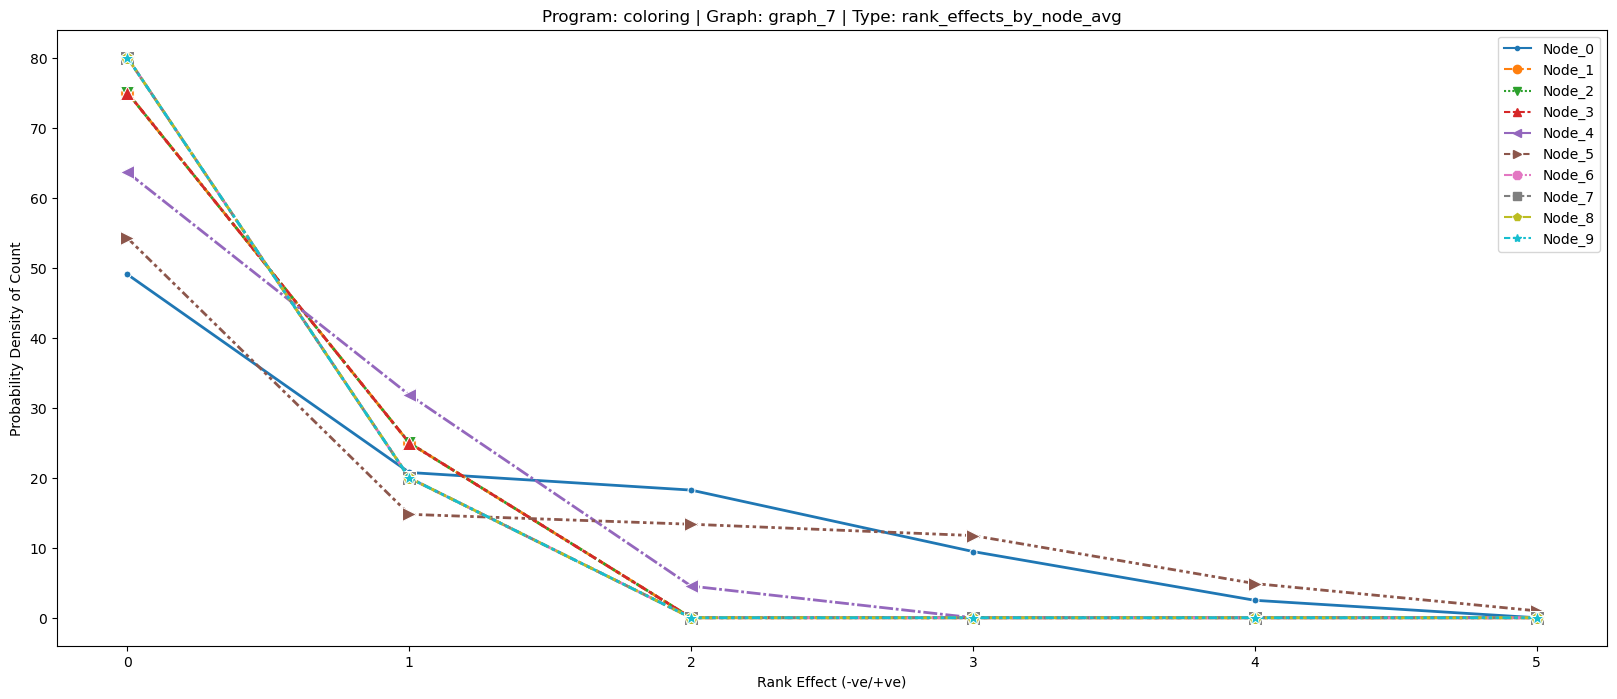

In [20]:
plt.legend()
plt.title(parse_filename(filename))
plt.xlabel("Rank Effect (-ve/+ve)")
plt.ylabel("Probability Density of Count")
plt.show()